<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/DNA_Sequencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 머신러닝을 이용한 DNA Sequencing 

* DNA 시퀀스를 통해 유전자의 기능을 예측하는 분류(Classification) 모델 만들기

* https://github.com/krishnaik06/DNA-Sequencing-Classifier/blob/master/DNA%20Sequencing%20and%20applying%20Classifier.ipynb

#### 1) 데이터 불러오기


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
human_data = pd.read_table("human_data.txt")
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [90]:
chimp_data = pd.read_table('chimp_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [91]:
dog_data = pd.read_table('dog_data.txt')
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


#### 2) 데이터 전처리

* 주어진 데이터들을 분류 또는 회귀 모델의 입력으로 사용하기 위해선 고정된 길이의 벡터로 만들 필요가 있습니다.

* 이를 위해 우리는 DNA 시퀀스를 마치 언어처럼 다루려 합니다.

* 하나의 긴 시퀀스를 k-mer 길이의 "words" 로 분리합니다.

* 예를 들어, 'ATGCATGCA'를 길이가 6인 "words"(=hexamers)로 분리하면

    'ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA'

* 이러한 처리를 유전학에서는 "k-mer counting" 이라고 합니다.


In [92]:
# DNA 시퀀스를 지정한 길이(size)의 k-mer "words" 로 바꾸는 함수

def getKmers(sequence, size=6):
  return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [93]:
# 예시) AGCTTTAA 
# -> AGCTTT / GCTTTA / CTTTAA : 8-6+1 = 3개의 hexamers
example = 'AGCTTTAA'

print([example[x:x+6] for x in range(len(ex)-6+1)])

['AGCTTT', 'GCTTTA', 'CTTTAA']


In [94]:
# 훈련 데이터를 길이 6의 k-mers(=hexamers) 로 바꾸는 과정

human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)

chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)

dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [95]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


* 각 데이터(=유전자)마다 생성된 lists of k-mers를 sentences of words로 바꿔서 CountVectorizer를 사용할 수 있게끔 합니다.

* y_data는 class_labels 를 담는 용도로 사용합니다.

In [96]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
  human_texts[item] = ' '.join(human_texts[item])

y_data = human_data.iloc[:,0].values

In [97]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [98]:
y_data  # class_labels

array([4, 4, 3, ..., 6, 6, 6])

In [99]:
# chimp/dog data 에 대해서도 동일한 작업 수행

chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
  chimp_texts[item] = ' '.join(chimp_texts[item])

y_chimp = chimp_data.iloc[:, 0].values

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
  dog_texts[item] = ' '.join(dog_texts[item])

y_dog = dog_data.iloc[:, 0].values

In [100]:
# CountVectorizer 를 통해 BOW 생성
# n_gram size 인 4는 param_tuning 으로 사전에 구해진 값

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(human_texts)
x_chimp = cv.fit_transform(chimp_texts)
x_dog = cv.fit_transform(dog_texts)

In [101]:
print(x.shape)
print(x_chimp.shape)
print(x_dog.shape)

(4380, 232414)
(1682, 229684)
(820, 227149)


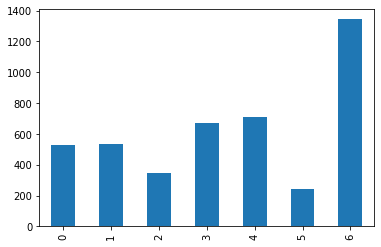

In [103]:
# 비교적 균형잡인 데이터셋

human_data['class'].value_counts().sort_index().plot.bar()

In [104]:
# human 데이터셋을 훈련/테스트셋으로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_data,
                                                    test_size=0.20,
                                                    random_state=42)

In [105]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [119]:
# chimp/dog 데이터셋을 훈련/테스트셋으로 분리
X_chimp_train, X_chimp_test, y_chimp_train, y_chimp_test = train_test_split(
                                                            x_chimp, y_chimp,
                                                            test_size=0.20,
                                                            random_state=42)

X_dog_train, X_dog_test, y_dog_train, y_dog_test = train_test_split(
                                                      x_dog, y_dog,
                                                      test_size=0.20,
                                                      random_state=42)

In [120]:
print('X_chimp')
print(X_chimp_train.shape)
print(X_chimp_test.shape)

print('\nX_dog')
print(X_dog_train.shape)
print(X_dog_test.shape)

X_chimp
(1345, 229684)
(337, 229684)

X_dog
(656, 227149)
(164, 227149)


#### 3) 분류 모델 생성 - human / chimp / dog

In [106]:
# Multinomial Naive Bayes Classifier
# Grid Search 로 사전에 탐색된 alpha 값 사용

from sklearn.naive_bayes import MultinomialNB

# human
classifier = MultinomialNB(alpha=0.1) # 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [ ]:
# chimp
classifier_chimp = MultinomialNB(alpha=0.1)
classifier_chimp.fit(X_chimp_train, y_chimp_train)

y_chimp_pred = classifier_chimp.predict(X_chimp_test)

# dog
classifier_dog = MultinomialNB(alpha=0.1)
classifier_dog.fit(X_dog_train, y_dog_train)

y_dog_pred = classifier_dog.predict(X_dog_test)

#### 4) 성능 평가

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_predicted):
  accuracy = accuracy_score(y_test, y_predicted)
  precision = precision_score(y_test, y_predicted, average='weighted')
  recall = recall_score(y_test, y_predicted, average='weighted')
  f1 = f1_score(y_test, y_predicted, average='weighted')
  return accuracy, precision, recall, f1

In [124]:
print("Human : Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("\nacc = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Human : Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263

acc = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [125]:
print("Chimp : Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chimp_test, name='Actual'), pd.Series(y_chimp_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_chimp_test, y_chimp_pred)
print("\nacc = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Chimp : Confusion matrix

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118

acc = 0.914 
precision = 0.920 
recall = 0.914 
f1 = 0.911


In [126]:
print("Dog : Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog_test, name='Actual'), pd.Series(y_dog_pred, name='Predicted')))

accuracy, precision, recall, f1 = get_metrics(y_dog_test, y_dog_pred)
print("\nacc = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Dog : Confusion matrix

Predicted   0   1   2  3  4  5   6
Actual                            
0          21   0   0  0  0  0   6
1           2  12   0  0  0  0   5
2           1   0  10  0  0  0   3
3           1   0   0  8  0  0   7
4           3   0   0  2  7  0  11
5           2   0   0  1  0  5   5
6           0   0   0  1  0  0  51

acc = 0.695 
precision = 0.785 
recall = 0.695 
f1 = 0.678


#### 5) 결과 분석 및 소감

* human model과 chimp model은 각각 acc 기준으로 0.98, 0.91 이라는 높은 정확도를 보여주었습니다.

* 하지만 dog model은 0.69 라는 비교적 낮은 수치의 정확도를 기록했습니다.

* 이러한 차이가 발생한 것은 각 모델마다 사용된 데이터의 양이 다르기 때문이라 생각합니다.

* 가장 높은 성능을 보인 human model은 3500개, 그 다음인 chimp model은 1350개, 가장 낮은 dog model은 650개의 훈련 데이터셋을 가졌습니다. 

* 훈련 데이터의 부족으로 인한 underfitting 이 낮은 performance 로 이어진 것으로 생각되며, 데이터만 충분히 확보된다면 보다 높은 performance 를 보일 것으로 예상합니다.


* NLP를 DNA Sequencing 에 활용한다는 아이디어가 새롭게 다가왔고, 높은 성능을 보여서 더 놀라웠습니다. 

* "k-mer counting" 의 컨셉이 N-gram 언어 모델에서 사용한 n-gram 의 개념과 상당히 유사하다고 느꼈습니다.

* NLP에서 유용했던 또다른 개념들 혹은 모델들이 유용하게 활용될 수 있을지 더 알아보고 싶다는 생각도 들었습니다.